In [62]:
#import libraries
import pandas as pd
import numpy as np

#import plot libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import standardlization, onehotcoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 

from sklearn.model_selection import train_test_split

#import modeles and metrics
from sklearn import tree
from dtreeviz.trees import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


import datetime as dt
from datetime import datetime, timedelta

In [63]:
#loading datasets
clients = pd.read_csv('clients.csv')
customer = pd.read_csv('customers.csv')
messages = pd.read_csv('messages.csv')

**File 1: clients dataset**

In [64]:
#file 1 inspection
print(clients.columns.is_unique)
print(clients.shape)
print(clients[clients.duplicated()== True])
clients.info()

True
(8, 4)
Empty DataFrame
Columns: [id, name, product_type, country]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8 non-null      object
 1   name          8 non-null      object
 2   product_type  8 non-null      object
 3   country       8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [65]:
#change column name,prepare for datasets join
clients = clients.rename(
    columns = {'id':'client_id'})
clients.describe()

,client_id,name,product_type,country
count,8,8,8,8
unique,8,8,3,3
top,cfcd208495d565ef66e7dff9f98764da,SwanPay,BNPL,UK
freq,1,1,3,3


Key insight:    
--no missing values in the dataset
--all object features
--all columns are unique, no duplicate rows identified

**File 2 : customer dataset**

In [66]:
#File 2 inspection
print(customer.columns.is_unique)
print(customer.shape)
print(customer[customer.duplicated()==True])
customer.info()

True
(10000, 6)
Empty DataFrame
Columns: [id, client_id, gender, country, age, created_at]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10000 non-null  object 
 1   client_id   10000 non-null  object 
 2   gender      7979 non-null   object 
 3   country     8058 non-null   object 
 4   age         8575 non-null   float64
 5   created_at  10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB


In [67]:
customer.describe()

,age
count,8575.000000
mean,40.950204
std,17.641473
min,18.000000
25%,25.000000
50%,38.000000
75%,52.000000
max,96.000000


Key insight:    
-- missing values in the 'gender','country','age'
--all object features but 'age'
--all columns are unique, no duplicate rows identified

In [68]:
#join file 1&2 on key 'client_id'
client_customer = pd.merge(customer,clients,left_on=['client_id'], right_on=['client_id'], how = 'left')

In [69]:
#change column name,prepare for datasets join
client_customer = client_customer.rename(
    columns = {'country_x':'country_customer','country_y':'country_client','name':'client_name','id':'customer_id'})

**File 3: messages dataset**

In [70]:
# File 3 inspection
print(messages.columns.is_unique)
print(messages.shape)
print(messages[messages.duplicated()==True])
messages.info()

True
(145941, 5)
Empty DataFrame
Columns: [id, customer_id, sent_at, clicked, converted]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145941 entries, 0 to 145940
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           145941 non-null  object
 1   customer_id  145941 non-null  object
 2   sent_at      145941 non-null  object
 3   clicked      145941 non-null  int64 
 4   converted    145941 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [71]:
messages.describe()

,clicked,converted
count,145941.000000,145941.000000
mean,0.064231,0.021529
std,0.245166,0.145141
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Key insight:    
-- no missing values in the dataset
--all object features but 'clicked','converted'
-- 'clicked' and 'converted' values between 1 and 0
-- 'converted' mean lower than 'clicked'
--all columns are unique, no duplicate rows identified

In [72]:
#final join table with messages dataset, on key customer_id
df = pd.merge(messages,client_customer,left_on=['customer_id'], right_on=['customer_id'], how = 'left')

In [73]:
print(df.columns.is_unique)
print(df.shape)
print(df[df.duplicated()==True])
df.info()

True
(145941, 13)
Empty DataFrame
Columns: [id, customer_id, sent_at, clicked, converted, client_id, gender, country_customer, age, created_at, client_name, product_type, country_client]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145941 entries, 0 to 145940
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                145941 non-null  object 
 1   customer_id       145941 non-null  object 
 2   sent_at           145941 non-null  object 
 3   clicked           145941 non-null  int64  
 4   converted         145941 non-null  int64  
 5   client_id         145941 non-null  object 
 6   gender            114265 non-null  object 
 7   country_customer  115795 non-null  object 
 8   age               123921 non-null  float64
 9   created_at        145941 non-null  object 
 10  client_name       145941 non-null  object 
 11  product_type      145941 non-null  object 
 12  country_client 

In [74]:
df.describe()

,clicked,converted,age
count,145941.000000,145941.000000,123921.000000
mean,0.064231,0.021529,43.041857
std,0.245166,0.145141,17.772985
min,0.000000,0.000000,18.000000
25%,0.000000,0.000000,26.000000
50%,0.000000,0.000000,44.000000
75%,0.000000,0.000000,55.000000
max,1.000000,1.000000,96.000000


Key insight:    
-- missing values in the dataset, 'gender', 'country_customer', 'age'
-- all object features but 'clicked','converted','age'
-- 'clicked' and 'converted' values between 1 and 0
-- 'converted' mean lower than 'clicked'
--all columns are unique, no duplicate rows identified
-- 'clicked','converted','age columns have diffrent scale range

In [75]:
#rename columns and drop unwanted columns 
df = df.rename(
    columns = {'sent_at':'email_sent_at','clicked':'service_clicked'})

**Create a datasets with day off hours,and weekend date**

In [77]:
#prepare a extra datasets about out work hours and weekend from 1/4/2021

df_dayoff = pd.date_range(start='1/4/2021',periods=6481,freq='H').to_frame()
df_dayoff = df_dayoff.rename(
    columns = {0:'email_sent_at'})
df_dayoff = df_dayoff.reset_index(drop=True)

#prepare list
gender ={'F','M'}
country ={'CA','NZ','UK'}
product_type ={'BNPL','CreditCard','Energy'}

df_dayoff['service_clicked']= np.random.choice((0,1),size=df_dayoff.shape[0]).astype(float)
df_dayoff['converted']= 0
df_dayoff['gender']= np.random.choice(list(gender),size=df_dayoff.shape[0])
df_dayoff['country_customer']= np.random.choice(list(country),size=df_dayoff.shape[0])
df_dayoff['age']= np.random.randint(18,90, size=df_dayoff.shape[0]).astype(float)
df_dayoff['product_type']= np.random.choice(list(product_type),size=df_dayoff.shape[0])

#one hot coding, add features
encoderoff = OneHotEncoder(sparse =False)
encodeoff_cols= ['gender', 'product_type','country_customer']

df_encodedoff = pd.DataFrame(encoderoff.fit_transform(df_dayoff[encodeoff_cols]))
df_encodedoff.columns = encoderoff.get_feature_names(encodeoff_cols)

# Replace Categotical Data with Encoded Data
df_dayoff = df_dayoff.drop(encodeoff_cols,axis = 1)
df_dayoff = df_dayoff.reset_index(drop=True)
df_dayoff = pd.concat([df_encodedoff, df_dayoff], axis = 1)

#set index as date column
df_dayoff= df_dayoff.set_index('email_sent_at')
df_dayoff.index=pd.to_datetime(df_dayoff.index)

#add time series features based on time series index.
def creat_features(df_dayoff):
    df_dayoff['hour']=df_dayoff.index.hour
    df_dayoff['dayofweek']=df_dayoff.index.day_of_week
    df_dayoff['dayofyear']=df_dayoff.index.dayofyear
    df_dayoff['isweekend'] = np.where((df_dayoff['dayofweek'] == 5) | (df_dayoff['dayofweek'] == 6), 1, 0)
    return df_dayoff

df_dayoff = creat_features(df_dayoff)

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,email_sent_at,service_clicked,converted,age
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2021-01-04 00:00:00,1.0,0,50.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2021-01-04 01:00:00,1.0,0,38.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2021-01-04 02:00:00,1.0,0,20.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2021-01-04 03:00:00,0.0,0,73.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2021-01-04 04:00:00,0.0,0,56.0


In [79]:
#creat weekend dataset, set 'converted' is zero 
df_weekend = df_dayoff[df_dayoff['isweekend'].isin([1])]

#prepare list
offhr_ca ={0,1,2,3,4,5,6,7,8,17,18,19,20,21,22,23}
offhr_nz ={0,1,2,3,4,5,6,7,8,18,19,20,21,22,23}
offhr_uk ={0,1,2,3,4,5,6,7,20,21,22,23}

#creat CA weekday offhour datasets, set 'converted' is zero 
df_week = df_dayoff[df_dayoff['isweekend'].isin([0])]
df_weekca = df_week[df_week['country_customer_CA'].isin([1])]
df_weekca = df_weekca[df_weekca['hour'].isin(list(offhr_ca))]

#creat NZ weekday offhour datasets, set 'converted' is zero 
df_weeknz = df_week[df_week['country_customer_NZ'].isin([1])]
df_weeknz = df_weeknz[df_weeknz['hour'].isin(list(offhr_nz))]

#creat UK weekday offhour datasets, set 'converted' is zero 
df_weekuk = df_week[df_week['country_customer_UK'].isin([1])]
df_weekuk = df_weekuk[df_weekuk['hour'].isin(list(offhr_uk))]

#merging all weekend and offhours datasets in each country
df_off = pd.concat([df_weekend,df_weekca,df_weeknz,df_weekuk])

#drop not use column
df_off = df_off.drop(['isweekend'],axis = 1)
df_off.head()

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age,hour,dayofweek,dayofyear
email_sent_at,,,,,,,,,,,,,,
2021-01-09 00:00:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,75.0,0,5,9
2021-01-09 01:00:00,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,29.0,1,5,9
2021-01-09 02:00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,40.0,2,5,9
2021-01-09 03:00:00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,38.0,3,5,9
2021-01-09 04:00:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,20.0,4,5,9


In [80]:
df_off.reset_index(inplace=True)

**Prepare orignol datasets**

In [81]:
df=df.drop(columns=['id', 'customer_id','client_id','created_at'])

In [82]:
#fix missing values
#fill NaN in 'country_customer' column with 'country_client' value
df['country_customer']=df['country_customer'].fillna(df['country_client'])

In [83]:
#fill missing values
#fill NaN in 'age' column with median values
#groupby remove rows where gender is NaN 
df = df.groupby(['gender'], group_keys=False).apply(lambda x: x.fillna(x.median()))

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114265 entries, 0 to 145940
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_sent_at     114265 non-null  object 
 1   service_clicked   114265 non-null  int64  
 2   converted         114265 non-null  int64  
 3   gender            114265 non-null  object 
 4   country_customer  114265 non-null  object 
 5   age               114265 non-null  float64
 6   client_name       114265 non-null  object 
 7   product_type      114265 non-null  object 
 8   country_client    114265 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 12.7+ MB


Key insight:   

no missing values in the dataset
all object features but 'service_clicked','converted','age'
'clicked' and 'converted' values between 1 and 0
'converted' mean lower than 'clicked'
all columns are unique, no duplicate rows identified

'clicked','converted','age columns have diffrent scale range

'age','gender','service_clicked' and ' product type' have strong to medium association with target,analysised from EDA section

In [85]:
#feature creation: one hot coding, add features
encoder = OneHotEncoder(sparse =False)
encode_cols= ['gender', 'product_type','country_customer']

df_encoded = pd.DataFrame(encoder.fit_transform(df[encode_cols]))
df_encoded.columns = encoder.get_feature_names(encode_cols)

# Replace Categotical Data with Encoded Data
df = df.drop(encode_cols,axis = 1)
df = df.reset_index(drop=True)
df = pd.concat([df_encoded, df], axis = 1)

print('Shape of dataframe:', df.shape)

Shape of dataframe: (114265, 14)


In [86]:
#drop none use featuers
df = df.drop(['client_name','country_client'],axis = 1)
df = df.reset_index(drop=True)

In [87]:
df['email_sent_at'] = pd.to_datetime(df['email_sent_at'])
type(df['email_sent_at'])

pandas.core.series.Series

In [88]:
#set email set at as index , prepare add feature, split train set and test set
df= df.set_index('email_sent_at')
df.index=pd.to_datetime(df.index)
df.head()

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age
email_sent_at,,,,,,,,,,,
2021-01-04 10:03:16.376000+00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,51.0
2021-01-04 10:42:47.027000+00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,38.0
2021-01-04 11:18:23.996000+00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,48.0
2021-01-04 12:53:56.733000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,26.0
2021-01-04 12:54:02.700000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,38.0


In [89]:
#count target values
df['converted'].value_counts()

0    111661
1      2604
Name: converted, dtype: int64

**add more features**

feature creation: creat time series features based on time series index.

add: hour, day of week and day of year features

In [90]:
#add more features
#feature creation: creat time series features based on time series index.

def creat_features(df):
    df['hour']=df.index.hour
    df['dayofweek']=df.index.day_of_week#.map(day_mapping)
    df['dayofyear']=df.index.dayofyear
    return df
df = creat_features(df)
df.head()

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age,hour,dayofweek,dayofyear
email_sent_at,,,,,,,,,,,,,,
2021-01-04 10:03:16.376000+00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,51.0,10,0,4
2021-01-04 10:42:47.027000+00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,38.0,10,0,4
2021-01-04 11:18:23.996000+00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,48.0,11,0,4
2021-01-04 12:53:56.733000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,26.0,12,0,4
2021-01-04 12:54:02.700000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,38.0,12,0,4


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114265 entries, 2021-01-04 10:03:16.376000+00:00 to 2021-10-01 19:58:46.086000+00:00
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender_F                 114265 non-null  float64
 1   gender_M                 114265 non-null  float64
 2   product_type_BNPL        114265 non-null  float64
 3   product_type_CreditCard  114265 non-null  float64
 4   product_type_Energy      114265 non-null  float64
 5   country_customer_CA      114265 non-null  float64
 6   country_customer_NZ      114265 non-null  float64
 7   country_customer_UK      114265 non-null  float64
 8   service_clicked          114265 non-null  int64  
 9   converted                114265 non-null  int64  
 10  age                      114265 non-null  float64
 11  hour                     114265 non-null  int64  
 12  dayofweek                114265 non-null  int64  
 13 

**Standarlization/trim outliers**

In [92]:
#duplicate datasets
df_copy = df.copy()

#standarlization for trim outliers
#scaler = StandardScaler()
#num_cols = ['age','dayofyear']
#df_copy[num_cols]=scaler.fit_transform(df[num_cols])

#there are two integer columns diffrent orther colunms

df_copy.head()

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age,hour,dayofweek,dayofyear
email_sent_at,,,,,,,,,,,,,,
2021-01-04 10:03:16.376000+00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,51.0,10,0,4
2021-01-04 10:42:47.027000+00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,38.0,10,0,4
2021-01-04 11:18:23.996000+00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,48.0,11,0,4
2021-01-04 12:53:56.733000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,26.0,12,0,4
2021-01-04 12:54:02.700000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,38.0,12,0,4


In [93]:
df_copy.reset_index(inplace=True)
df_copy.head()

,email_sent_at,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age,hour,dayofweek,dayofyear
0,2021-01-04 10:03:16.376000+00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,51.0,10,0,4
1,2021-01-04 10:42:47.027000+00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,38.0,10,0,4
2,2021-01-04 11:18:23.996000+00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,48.0,11,0,4
3,2021-01-04 12:53:56.733000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,26.0,12,0,4
4,2021-01-04 12:54:02.700000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,38.0,12,0,4


In [94]:
#change series data type to object 
df_copy['email_sent_at'].dt
df_copy.head()

,email_sent_at,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age,hour,dayofweek,dayofyear
0,2021-01-04 10:03:16.376000+00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,51.0,10,0,4
1,2021-01-04 10:42:47.027000+00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,38.0,10,0,4
2,2021-01-04 11:18:23.996000+00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,48.0,11,0,4
3,2021-01-04 12:53:56.733000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,26.0,12,0,4
4,2021-01-04 12:54:02.700000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,38.0,12,0,4


**merging original and offhours datasets,increase size of datasets**

In [95]:
#merging all weekend and offhours datasets in each country
df_copy = pd.concat([df_copy,df_off])
df_copy.head()

,email_sent_at,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,converted,age,hour,dayofweek,dayofyear
0,2021-01-04 10:03:16.376000+00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,51.0,10,0,4
1,2021-01-04 10:42:47.027000+00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,38.0,10,0,4
2,2021-01-04 11:18:23.996000+00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,48.0,11,0,4
3,2021-01-04 12:53:56.733000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,26.0,12,0,4
4,2021-01-04 12:54:02.700000+00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,38.0,12,0,4


In [96]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118857 entries, 0 to 4591
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   email_sent_at            118857 non-null  object 
 1   gender_F                 118857 non-null  float64
 2   gender_M                 118857 non-null  float64
 3   product_type_BNPL        118857 non-null  float64
 4   product_type_CreditCard  118857 non-null  float64
 5   product_type_Energy      118857 non-null  float64
 6   country_customer_CA      118857 non-null  float64
 7   country_customer_NZ      118857 non-null  float64
 8   country_customer_UK      118857 non-null  float64
 9   service_clicked          118857 non-null  float64
 10  converted                118857 non-null  int64  
 11  age                      118857 non-null  float64
 12  hour                     118857 non-null  int64  
 13  dayofweek                118857 non-null  int64  
 14  dayofy

In [97]:
df_copy= df_copy.set_index('email_sent_at')
df_copy.index=pd.to_datetime(df_copy.index,utc=True)

In [98]:
df_copy.reset_index(inplace=True)

In [99]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118857 entries, 0 to 118856
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   email_sent_at            118857 non-null  datetime64[ns, UTC]
 1   gender_F                 118857 non-null  float64            
 2   gender_M                 118857 non-null  float64            
 3   product_type_BNPL        118857 non-null  float64            
 4   product_type_CreditCard  118857 non-null  float64            
 5   product_type_Energy      118857 non-null  float64            
 6   country_customer_CA      118857 non-null  float64            
 7   country_customer_NZ      118857 non-null  float64            
 8   country_customer_UK      118857 non-null  float64            
 9   service_clicked          118857 non-null  float64            
 10  converted                118857 non-null  int64              
 11  age          

In [100]:
#Sort the email_sent_at column by time
df_copy= df_copy.sort_values('email_sent_at')

In [101]:
df_copy= df_copy.set_index('email_sent_at')
df_copy.index=pd.to_datetime(df_copy.index,utc=True)

In [102]:
#reset index
df_copy.reset_index(inplace=True)

In [104]:
#find row#/date at 60%,50%,70%,80% split points,for training model later

print(df_copy.loc[[83199]])#7:3
#print(df_copy.loc[[95085]])#8:2
print(df_copy.loc[[59429]])#5:5
print(df_copy.loc[[71314]])#6:4

                         email_sent_at  gender_F  gender_M  product_type_BNPL  \
83199 2021-08-13 11:39:58.889000+00:00       0.0       1.0                0.0   

       product_type_CreditCard  product_type_Energy  country_customer_CA  \
83199                      0.0                  1.0                  0.0   

       country_customer_NZ  country_customer_UK  service_clicked  converted  \
83199                  1.0                  0.0              0.0          0   

        age  hour  dayofweek  dayofyear  
83199  79.0    11          4        225  
                         email_sent_at  gender_F  gender_M  product_type_BNPL  \
59429 2021-07-07 11:25:14.865000+00:00       1.0       0.0                0.0   

       product_type_CreditCard  product_type_Energy  country_customer_CA  \
59429                      1.0                  0.0                  0.0   

       country_customer_NZ  country_customer_UK  service_clicked  converted  \
59429                  0.0                  1.

In [105]:
#set date time as index for the final dataset
df_copy= df_copy.set_index('email_sent_at')
df_copy.index=pd.to_datetime(df_copy.index,utc=True)

**Creat predication model**

In [106]:
#  split dataset with ratio 70:30 
#70% at 2021-08-13

test_date = '2021-08-13'

target = 'converted'
features= [col for col in df_copy.columns if col != target]

train_data = df_copy.loc[df_copy.index <= test_date]
test_data = df_copy.loc[df_copy.index > test_date]


#X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.3)

x_train = train_data[features]
y_train = train_data[target]
x_test = test_data[features]
y_test = test_data[target]

# Show the Training and Testing Data
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (82567, 13)
Shape of testing feature: (36290, 13)
Shape of training label: (82567,)
Shape of testing label: (36290,)


**Evaluate model with metrics for classification problem**

In [107]:
#Evaluate model with metrics: accuracy, precision, recall, F1 score, confussion matrix and AUC

def evaluate_model(model, x_test, y_test):
    
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score,
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

**Model comparison**

Model1 : Random forest

Model2 : K-nearest neighbors

Model3 : Decision tree

Model4 : use RandomSearchCV find the best model

In [108]:
#Model 1: Random forest
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [109]:
# Evaluate Model 1 
rf_eval = evaluate_model(random_forest, x_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9755855607605401
Precision: 0.3872340425531915
Recall: 0.37551581843191195
F1 Score: 0.3812849162011173
Area Under Curve: 0.9808511937723631
Confusion Matrix:
 [[35131   432]
 [  454   273]]


In [110]:
#Model 2 : K-nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
# Evaluate Model 2 
knn_eval = evaluate_model(knn, x_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9794709286304767
Precision: 0.275
Recall: 0.015130674002751032
F1 Score: 0.02868318122555411
Area Under Curve: 0.6217978393614277
Confusion Matrix:
 [[35534    29]
 [  716    11]]


In [112]:
#Model 3 : Decision tree
decision_tree = tree.DecisionTreeClassifier(random_state=0,class_weight='balanced')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [113]:
#evaluate model 3:
dtree_eval = evaluate_model(decision_tree,x_test,y_test)

print('Accuracy: ', dtree_eval['acc'])
print('Precision: ', dtree_eval['prec'])
print('Recall: ', dtree_eval['rec'])
print('F1 Score: ', dtree_eval['f1'])
print('Area under Curve: ', dtree_eval['auc'])
print('Confusion Matrix: ', dtree_eval['cm'])

Accuracy:  0.9763295673739322
Precision:  0.4046242774566474
Recall:  0.38514442916093533
F1 Score:  0.3946441155743482
Area under Curve:  0.6867796773929413
Confusion Matrix:  [[35151   412]
 [  447   280]]


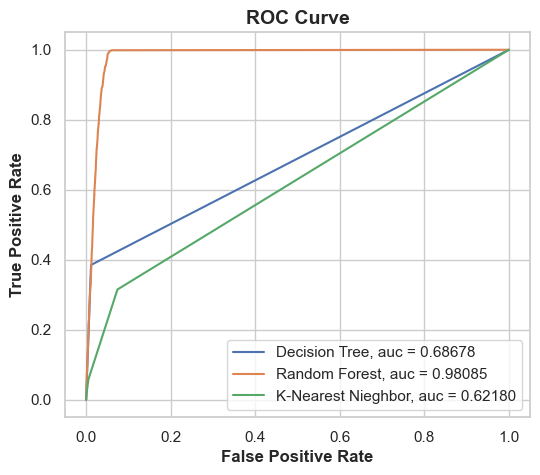

In [114]:
# Comparing ROC Curve
sns.set_theme(style='whitegrid')
fig,ax = plt.subplots(figsize=(6,5))
fig,ax.plot(dtree_eval['fpr'], dtree_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtree_eval['auc']))
fig,ax.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
fig,ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))


# label x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

# Create legend & title
ax.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax.legend(loc=4)

In [115]:
random_forest.feature_importances_

array([0.00461942, 0.00455979, 0.01458646, 0.00493988, 0.00396447,
       0.00757793, 0.01445337, 0.0053868 , 0.28710341, 0.19663109,
       0.14302068, 0.07545866, 0.23769804])

In [116]:
df_copy.columns

Index(['gender_F', 'gender_M', 'product_type_BNPL', 'product_type_CreditCard',
       'product_type_Energy', 'country_customer_CA', 'country_customer_NZ',
       'country_customer_UK', 'service_clicked', 'converted', 'age', 'hour',
       'dayofweek', 'dayofyear'],
      dtype='object')

In [141]:
# basic random forest model have hightest auc socre
# turn on parameters for basic random forest
# create the parameter dictionary based on the results of random search
#The initial value for each parameter is [10,100,1000,10000], and the value range is narrowed after the test.
# scoring choice f1, becuase the dataset is inbalanced dataet.

param_grid = {
    'max_depth': [50,100,150,200,250],
    #'max_features': [4,6,8,10],
    'min_samples_leaf': [2,3,4,5,6],
    'min_samples_split': [50,100,150,200,250],
    'n_estimators': [50,100,150,200,250]
}

# create a base model,turn on class_weight,reduce data inbalence
rf_grids = RandomForestClassifier(random_state=0,class_weight='balanced')

# initiate the grid search model,use bagging/folds reduce variance,focus on F1 score
random_search = RandomizedSearchCV(estimator=rf_grids,param_distributions = param_grid, scoring='f1',cv=5, n_jobs=-1, verbose=2)


# fit the grid search to the train sets
random_search.fit(x_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 250,
 'min_samples_split': 50,
 'min_samples_leaf': 3,
 'max_depth': 250}

In [142]:
# save best model (model4) with best fit
best_search = random_search.best_estimator_

#evaluate Model4
best_search_eval = evaluate_model(best_search, x_test, y_test)

#print result
print('Accuracy:', best_search_eval['acc'])
print('Precision:', best_search_eval['prec'])
print('Recall:', best_search_eval['rec'])
print('F1 Score:', best_search_eval['f1'])
print('Area Under Curve:', best_search_eval['auc'])
print('Confusion Matrix:\n', best_search_eval['cm'])

Accuracy: 0.9588591898594654
Precision: 0.3249542961608775
Recall: 0.9779917469050894
F1 Score: 0.4878216123499142
Area Under Curve: 0.984462391769942
Confusion Matrix:
 [[34086  1477]
 [   16   711]]


In [143]:
#compare evaluate result between basic random forest model and model4
print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_search_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_search_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_search_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_search_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_search_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

Change of -1.71% on accuracy.
Change of -16.08% on precision.
Change of 160.44% on recall.
Change of 27.94% on F1 score.
Change of 0.37% on AUC.


Recall, F1 score, AUC metrics score increased , especially recall score increased 160%. Although accuracy score was slightly dropped, the best_ best_serach model succused. A system with high recall but low precision (0.32) returns, is because some predicted labels are incorrect when compared to the training labels. However, a high recall score (0.97) means that the model covered the most of the correct labels. 

In [144]:
#test model predication
y_pred=best_search.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


**File 4: sample_customer_ids dataset,and test prediction**

In [145]:
#loading the test dataset,double the amount of data for include dayoff hours and weekends  
sample_customer = pd.read_csv('sample_customer_ids2.csv')

In [146]:
#expend datasets,add columns,create dummy data
#date from 4/Oct/2021

sample_customer['email_sent_at'] = pd.date_range(start='10/4/2021', periods=len(sample_customer),freq='H')
sample_customer['service_clicked']= np.random.choice((0,1),size=sample_customer.shape[0]).astype(float)
sample_customer['age']= np.random.randint(18,90, size=sample_customer.shape[0]).astype(float)
sample_customer['converted']= np.random.choice((0,1),size=sample_customer.shape[0]).astype(float)

product_type2 ={'BNPL','CreditCard','Energy'}
sample_customer['product_type']= np.random.choice(list(product_type2),size=sample_customer.shape[0])
gender2 ={'F','M'}
sample_customer['gender']= np.random.choice(list(gender2),size=sample_customer.shape[0])
country2 ={'CA','NZ','UK'}
sample_customer['country_customer']= np.random.choice(list(country2),size=sample_customer.shape[0])

In [147]:
#one hot coding, add features
encoder3 = OneHotEncoder(sparse =False)
encode_cols3= ['gender', 'product_type','country_customer']

sample_encoded3 = pd.DataFrame(encoder3.fit_transform(sample_customer[encode_cols3]))
sample_encoded3.columns = encoder3.get_feature_names(encode_cols3)

# Replace Categotical Data with Encoded Data
sample_customer = sample_customer.drop(encode_cols3,axis = 1)
sample_customer = sample_customer.reset_index(drop=True)
sample_customer = pd.concat([sample_encoded3, sample_customer], axis = 1)

print('Shape of dataframe:', sample_customer.shape)

Shape of dataframe: (199, 13)


In [148]:
#set index as date column
sample_customer= sample_customer.set_index('email_sent_at')
sample_customer.index=pd.to_datetime(sample_customer.index)

In [149]:
#add time series features

def creat_timefeatures(sample_customer):
    sample_customer['hour']=sample_customer.index.hour
    sample_customer['dayofweek']=sample_customer.index.day_of_week
    sample_customer['dayofyear']=sample_customer.index.dayofyear
    return sample_customer

sample_customer = creat_timefeatures(sample_customer)

In [150]:
#drop not use column
sample_customer = sample_customer.drop(['customer_id'],axis = 1)
sample_customer.head()

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,age,converted,hour,dayofweek,dayofyear
email_sent_at,,,,,,,,,,,,,,
2021-10-04 00:00:00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,42.0,0.0,0,0,277
2021-10-04 01:00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,84.0,1.0,1,0,277
2021-10-04 02:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22.0,0.0,2,0,277
2021-10-04 03:00:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,1.0,3,0,277
2021-10-04 04:00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,4,0,277


In [151]:
#group prediction features
target2 = 'converted'
features2=[col for col in sample_customer.columns if col != target]
x_test2 = sample_customer[features2]

In [152]:
#run model for new datasets, test run
sample_customer['converted_prediction'] = best_search.predict(x_test2)
sample_customer['converted_prediction'] = sample_customer['converted_prediction'].apply(lambda x: 'yes' if x==1 else 'no')
sample_customer.head()

,gender_F,gender_M,product_type_BNPL,product_type_CreditCard,product_type_Energy,country_customer_CA,country_customer_NZ,country_customer_UK,service_clicked,age,converted,hour,dayofweek,dayofyear,converted_prediction
email_sent_at,,,,,,,,,,,,,,,
2021-10-04 00:00:00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,42.0,0.0,0,0,277,no
2021-10-04 01:00:00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,84.0,1.0,1,0,277,no
2021-10-04 02:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22.0,0.0,2,0,277,no
2021-10-04 03:00:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,1.0,3,0,277,no
2021-10-04 04:00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,4,0,277,no


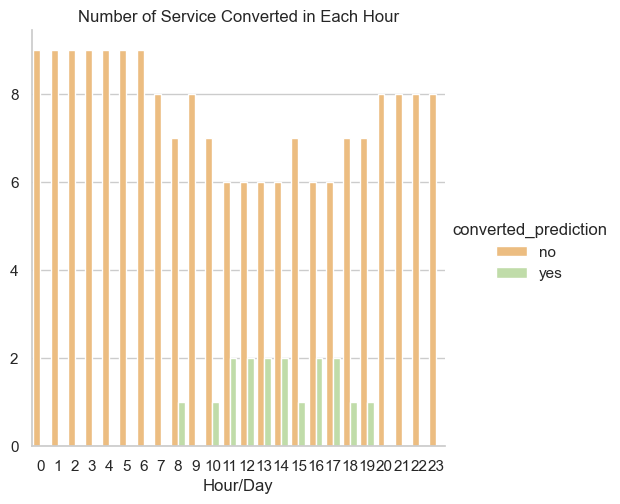

In [153]:
#ralte to hour?
# plot and count number of customer in hour

hr_count= sns.catplot(x='hour', kind='count',hue = 'converted_prediction',palette='Spectral', data=sample_customer)

# add label and title
hr_count.set(xlabel = 'Hour/Day', ylabel = '', title = 'Number of Service Converted in Each Hour')

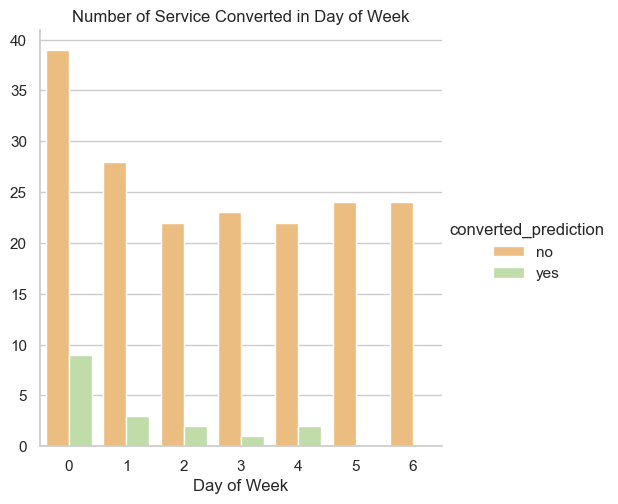

In [154]:
#ralte to day of week?
# plot and count number of customer in day of week
# 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'

week_count= sns.catplot(x='dayofweek', kind='count',hue = 'converted_prediction',palette='Spectral', data=sample_customer)

# add label and title
week_count.set(xlabel = 'Day of Week', ylabel = '', title = 'Number of Service Converted in Day of Week')

In [155]:
plt.show()

In the test data set, there is no converted_prediction marked "yes" after 20:00 and before 8am.

no converted_predictions marked "yes" over the weekend.

The optimized model predicts zero conversion for customers during dayoff hours and weekends, therefore customers will not receive emails from the company during dayoff hours and weekends.